# Лабораторно робота №2
Петро Бодруг ОІ-31


## Вступний код


In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
ds = pd.read_csv('variant_1.csv')

In [2]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  34 

columns:  ['Unnamed: 0', 'ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status']


In [3]:
ds.shape

(148670, 34)

In [4]:
len(ds[ds.duplicated()])

0

In [5]:
# Get all columns and their data types from the dataframe
columns_and_types = ds.dtypes
print(columns_and_types)

Unnamed: 0                     int64
ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
c

## Опрацювання аномалій(outlier)

In [6]:
import seaborn as sns
import scipy.stats as stats

In [7]:
ds.describe()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,0.000000,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


In [8]:
def diagnostic_plots(df, variable):
    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### Графіки

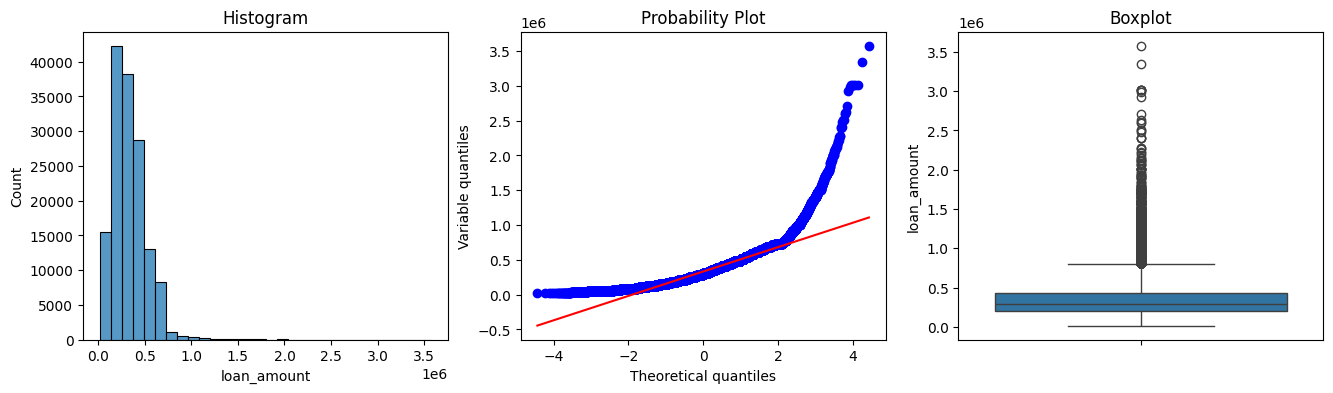

In [9]:
diagnostic_plots(ds, 'loan_amount')

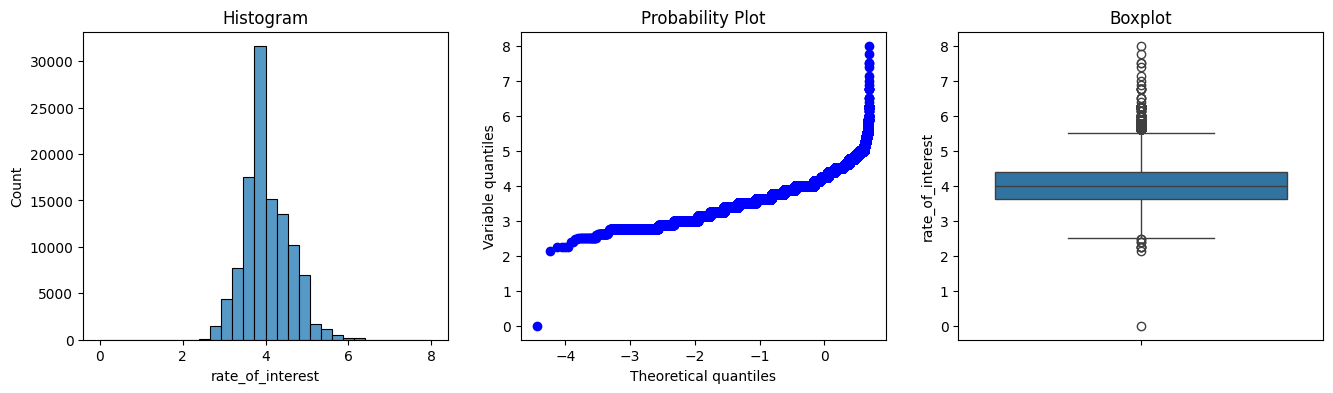

In [10]:
diagnostic_plots(ds, 'rate_of_interest')

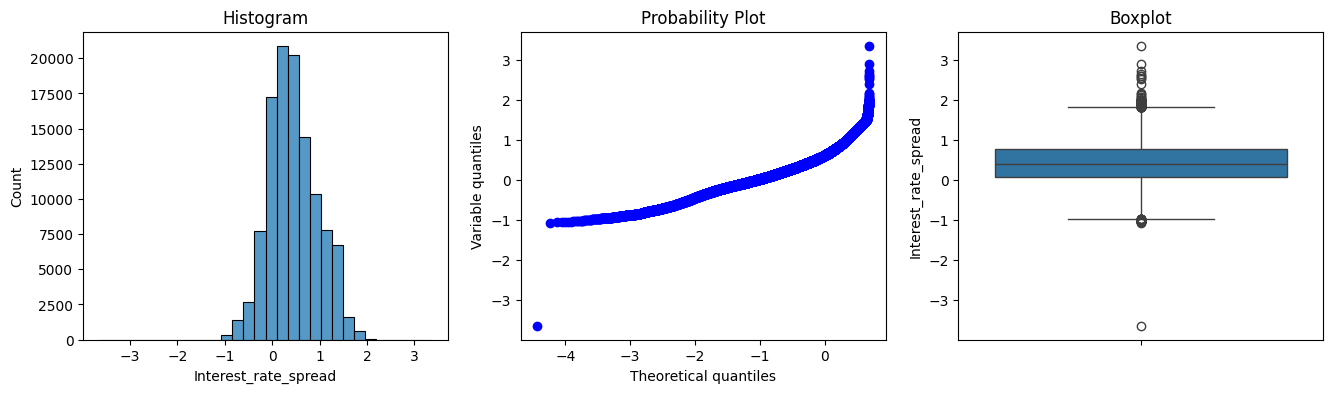

In [11]:
diagnostic_plots(ds, 'Interest_rate_spread')

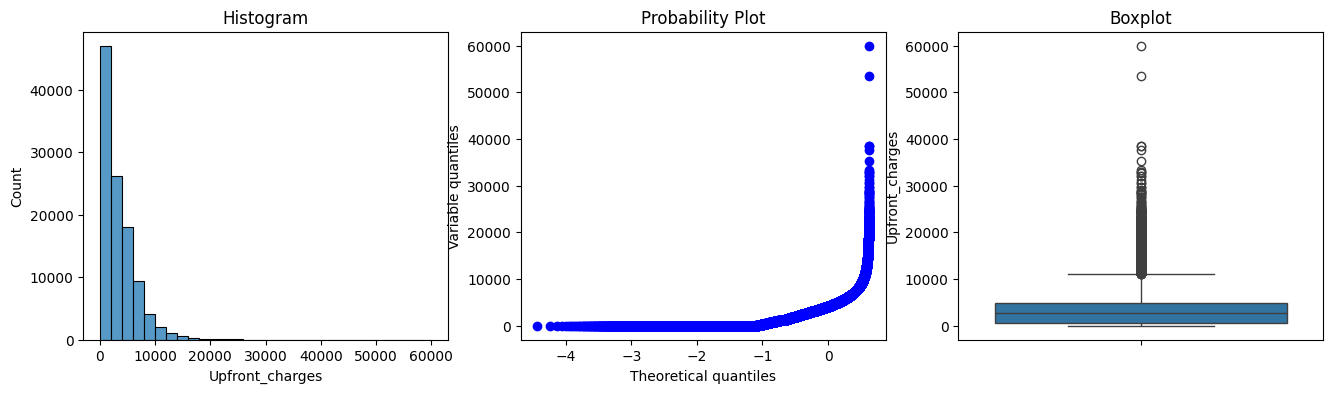

In [12]:
diagnostic_plots(ds, 'Upfront_charges')

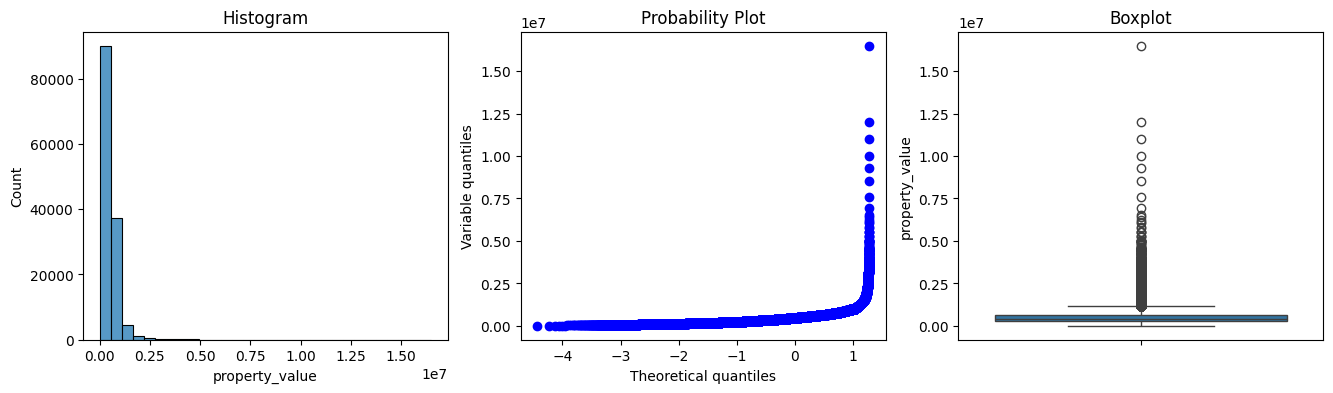

In [13]:
diagnostic_plots(ds, 'property_value')

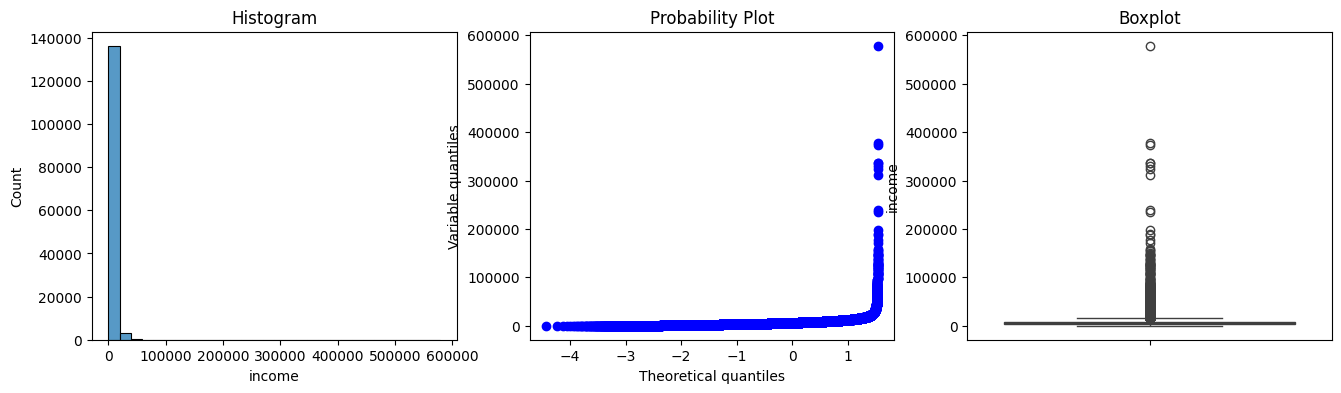

In [14]:
diagnostic_plots(ds, 'income')

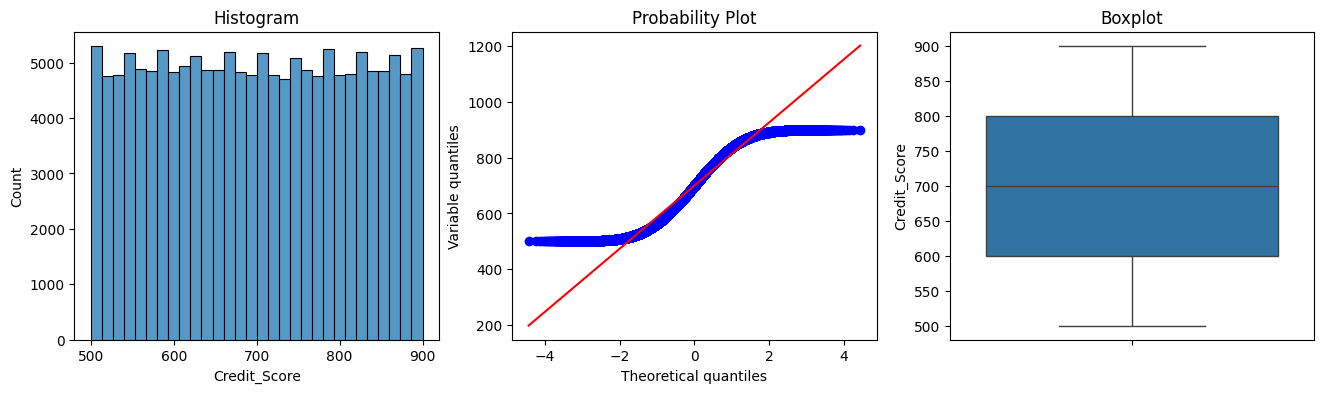

In [15]:
diagnostic_plots(ds, 'Credit_Score')

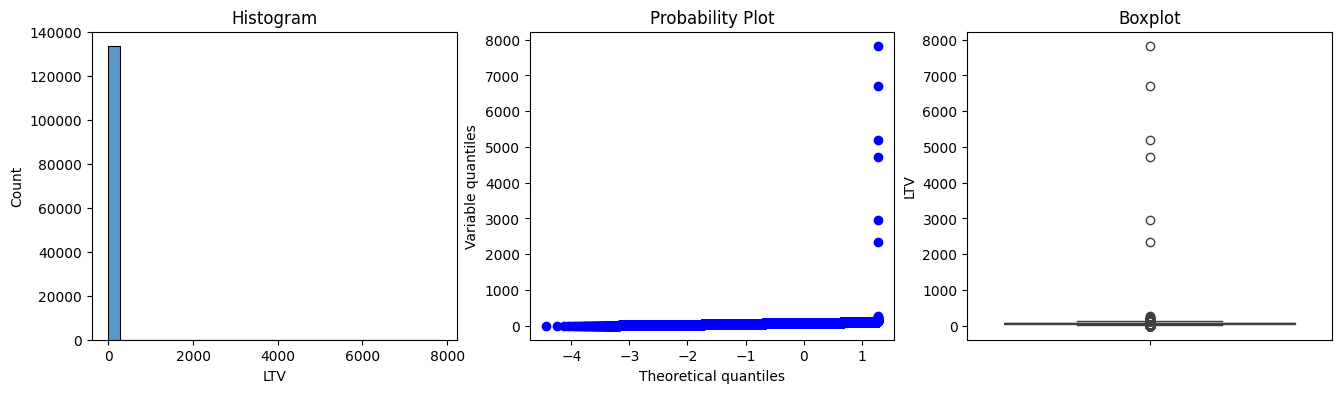

In [16]:
diagnostic_plots(ds, 'LTV')

### Обезаномалені графіки

In [17]:
def delete_anomalies(df, variable, distance=3):
    # Розрахунок меж на основі IQR
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    # Визначення аномалій
    anomaly_flags = np.where(df[variable] > upper_boundary, True,
                             np.where(df[variable] < lower_boundary, True, False))
    # Фільтрація набору даних, видаляючи аномалії
    df_filtered = df.loc[~anomaly_flags, :]

    # Виведення результатів
    print(f'Original shape: {df.shape}, Filtered shape: {df_filtered.shape}')
    print(f'{ds.shape[0] - df_filtered.shape[0]} outliers removed')

    return df_filtered
import numpy as np

def replace_anomalies(df, variable, distance=3):
    # Розрахунок меж на основі IQR
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    # Замінюємо значення, що перевищують верхню межу, на верхню межу
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                            np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))
    
    return df


In [18]:
ds_trimmed=ds
ds_trimmed=delete_anomalies(ds_trimmed,'LTV',2)
ds_trimmed=delete_anomalies(ds_trimmed,'Upfront_charges')
ds_trimmed=delete_anomalies(ds_trimmed,'Interest_rate_spread',2)
ds_trimmed=delete_anomalies(ds_trimmed,'rate_of_interest',2)
ds_trimmed=delete_anomalies(ds_trimmed,'loan_amount')
ds_trimmed=replace_anomalies(ds_trimmed,'income',9)
ds_trimmed=replace_anomalies(ds_trimmed,'property_value',6)



Original shape: (148670, 34), Filtered shape: (148417, 34)
253 outliers removed
Original shape: (148417, 34), Filtered shape: (147987, 34)
683 outliers removed
Original shape: (147987, 34), Filtered shape: (147976, 34)
694 outliers removed
Original shape: (147976, 34), Filtered shape: (147741, 34)
929 outliers removed
Original shape: (147741, 34), Filtered shape: (147319, 34)
1351 outliers removed


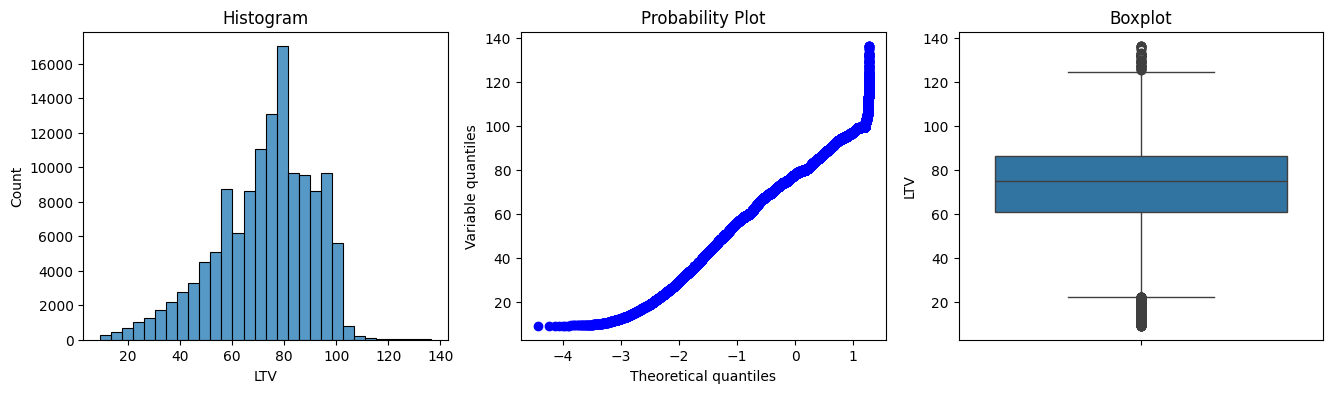

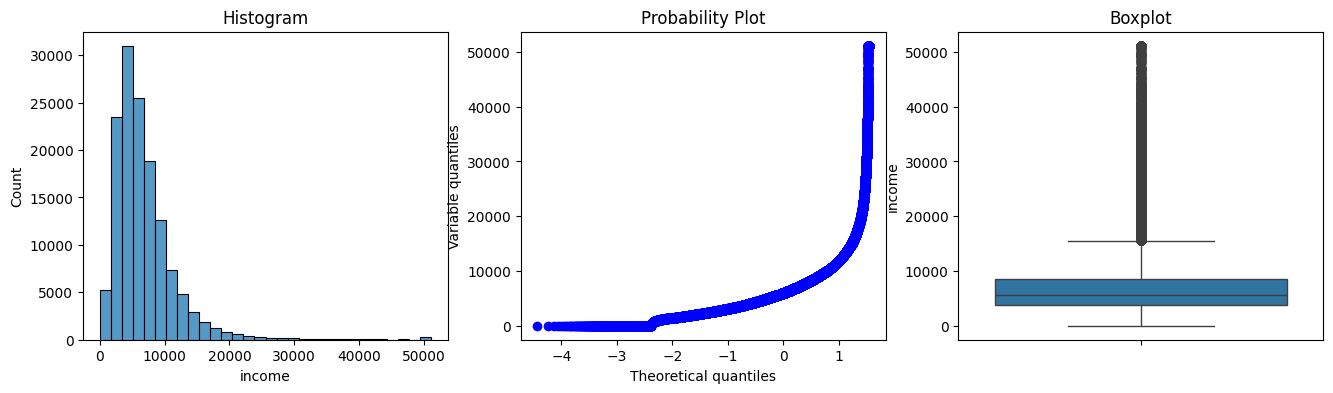

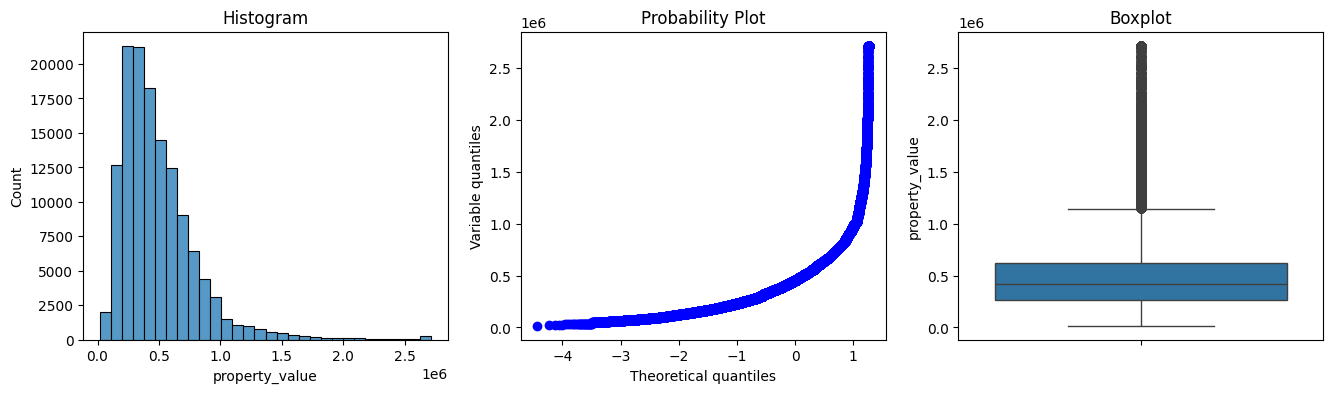

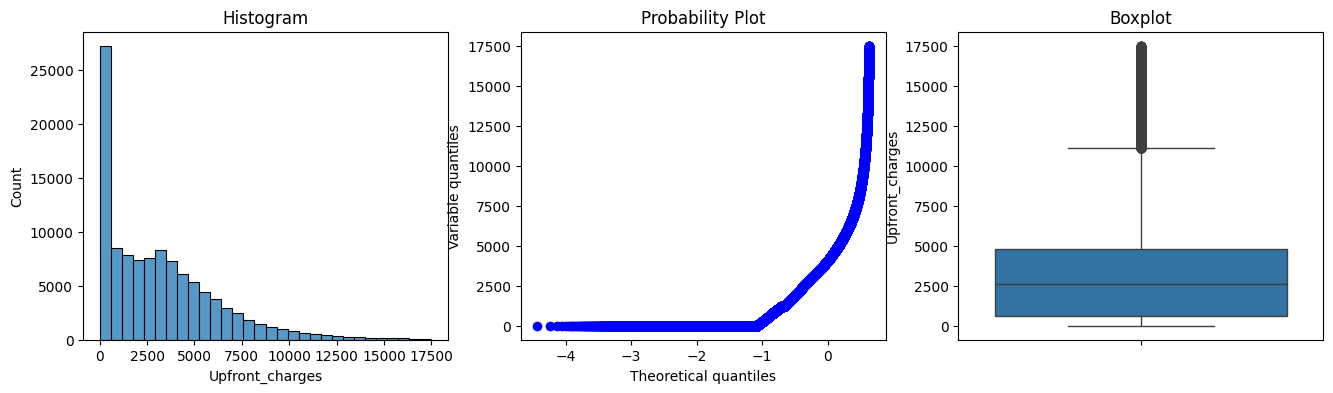

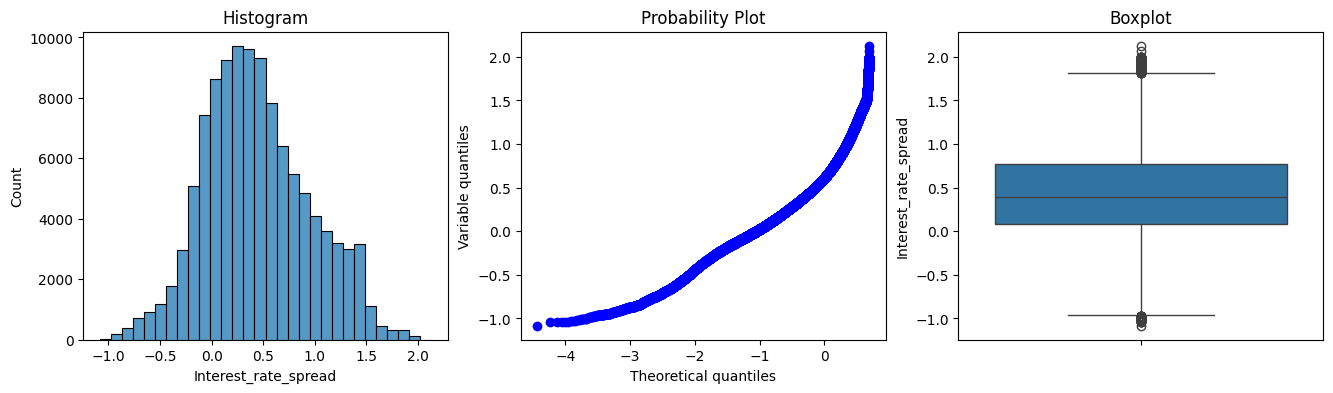

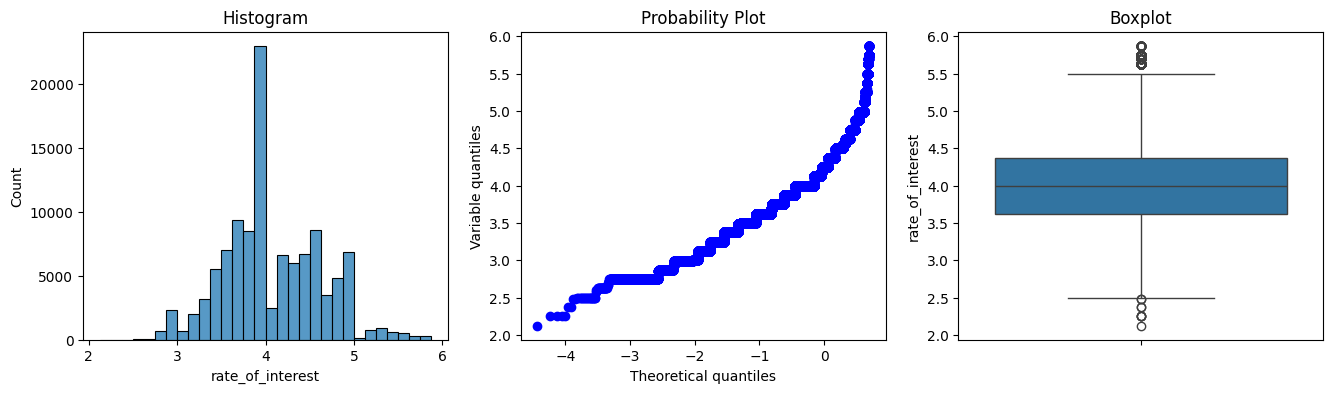

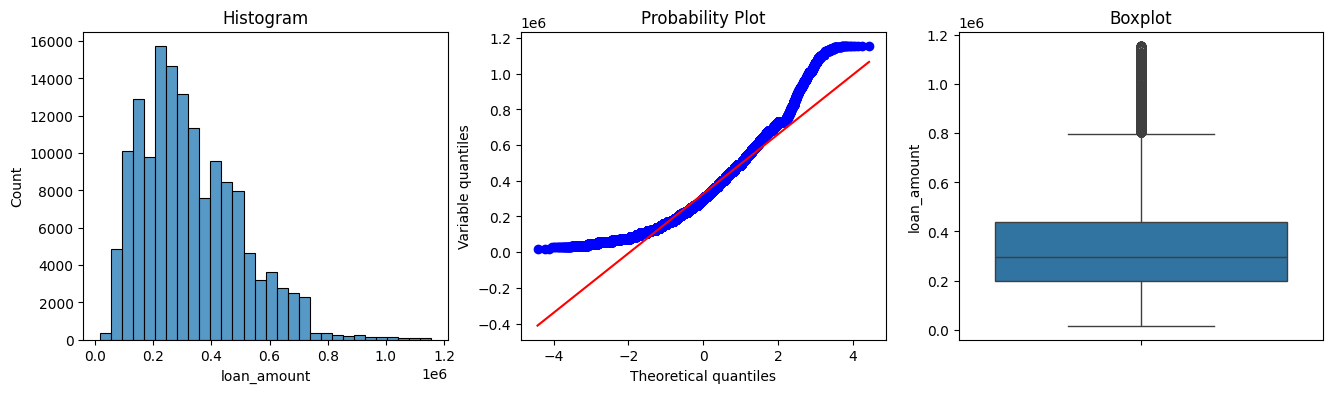

In [19]:
diagnostic_plots(ds_trimmed, 'LTV')
diagnostic_plots(ds_trimmed, 'income')
diagnostic_plots(ds_trimmed, 'property_value')
diagnostic_plots(ds_trimmed, 'Upfront_charges')
diagnostic_plots(ds_trimmed, 'Interest_rate_spread')
diagnostic_plots(ds_trimmed, 'rate_of_interest')
diagnostic_plots(ds_trimmed, 'loan_amount')







In [20]:
display(ds.describe())
display(ds_trimmed.describe())


,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,0.000000,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,147319.000000,147319.000000,147319.0,1.473190e+05,111209.000000,111010.000000,108312.000000,147279.000000,1.323010e+05,138195.000000,147319.000000,132301.000000,147319.000000
mean,74326.180384,99216.180384,2019.0,3.271901e+05,4.039955,0.439964,3152.818360,335.015576,4.868614e+05,6807.676978,699.802972,72.691226,0.246465
std,42924.176063,42924.176063,0.0,1.708481e+05,0.550108,0.511169,3041.033978,58.525009,3.156846e+05,4971.048833,115.876099,18.614027,0.430954
min,0.000000,24890.000000,2019.0,1.650000e+04,2.125000,-1.084100,0.000000,96.000000,1.800000e+04,0.000000,500.000000,9.118151,0.000000
25%,37153.500000,62043.500000,2019.0,1.965000e+05,3.625000,0.075800,571.732500,360.000000,2.680000e+05,3720.000000,599.000000,60.658915,0.000000
50%,74317.000000,99207.000000,2019.0,2.965000e+05,3.990000,0.389600,2580.185000,360.000000,4.180000e+05,5700.000000,699.000000,75.173611,0.000000
75%,111501.500000,136391.500000,2019.0,4.365000e+05,4.375000,0.772000,4775.000000,360.000000,6.180000e+05,8460.000000,800.000000,86.371237,0.000000
max,148669.000000,173559.000000,2019.0,1.156500e+06,5.875000,2.128200,17496.810000,360.000000,2.718000e+06,51120.000000,900.000000,136.538462,1.000000


## Заміна пропушених значень

In [21]:
missing = []

for x in ds_trimmed.columns:
    if ds_trimmed[x].isnull().sum() != 0:
        print(x, ds_trimmed[x].isnull().sum())
        missing.append(x)

loan_limit 3311
approv_in_adv 899
loan_purpose 133
rate_of_interest 36110
Interest_rate_spread 36309
Upfront_charges 39007
term 40
Neg_ammortization 120
property_value 15018
income 9124
age 199
submission_of_application 199
LTV 15018


In [22]:
for col in ds_trimmed.columns:
    if ds_trimmed[col].dtypes == object:
        print(col + ' ' + '-'*(30-len(col)) + ' ', ds_trimmed[col].unique())
    else:
        pass

loan_limit --------------------  ['cf' nan 'ncf']
Gender ------------------------  ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv -----------------  ['nopre' 'pre' nan]
loan_type ---------------------  ['type1' 'type2' 'type3']
loan_purpose ------------------  ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness -------------  ['l1' 'l2']
open_credit -------------------  ['nopc' 'opc']
business_or_commercial --------  ['nob/c' 'b/c']
Neg_ammortization -------------  ['not_neg' 'neg_amm' nan]
interest_only -----------------  ['not_int' 'int_only']
lump_sum_payment --------------  ['not_lpsm' 'lpsm']
construction_type -------------  ['sb' 'mh']
occupancy_type ----------------  ['pr' 'sr' 'ir']
Secured_by --------------------  ['home' 'land']
total_units -------------------  ['1U' '2U' '3U' '4U']
credit_type -------------------  ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ------  ['CIB' 'EXP']
age ---------------------------  ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<2

### Loan_limit

Дане поле має 2 основні значення cf(comfoming) та ncf(non-comforming).  Це тип позики яку пропонує банк. Комфорний  важжаються менш ризикованими та мають менші відсоткові ставки.<br><b>Буде логічним замінити пропущені значення на моду.</b>

In [23]:
print("Кількість пропущених значень:", ds_trimmed['loan_limit'].isna().sum())
mode_value = ds_trimmed['loan_limit'].mode()[0]
ds_trimmed['loan_limit'].fillna(mode_value, inplace=True)

print(ds_trimmed['loan_limit'].value_counts()) 

Кількість пропущених значень: 3311
loan_limit
cf     137905
ncf      9414
Name: count, dtype: int64


### approv_in_adv

Дане поле має 2 основні значення  nonpre(означає "без попереднього схвалення" (no pre-approval). Тобто, для даного запису не було отримано схвалення заздалегідь.) та pre (це може означати "з попереднім схваленням" (pre-approved). Тобто, для цього запису було отримано схвалення заздалегідь.)<br> <b>Для даного випадку заміняється значення на моду</b>

In [24]:
print("Кількість пропущених значень:", ds_trimmed['approv_in_adv'].isna().sum())
mode_value = ds_trimmed['approv_in_adv'].mode()[0]
ds_trimmed['approv_in_adv'].fillna(mode_value, inplace=True)

print(ds_trimmed['approv_in_adv'].value_counts()) 

Кількість пропущених значень: 899
approv_in_adv
nopre    124355
pre       22964
Name: count, dtype: int64


### loan_purpose

Дана колонка визначає мету для чого беруть кредит . Вона має 4 значення (p1-p4) . Для замніти nan значення використоується мода .

In [25]:
print("Кількість пропущених значень:", ds_trimmed['loan_purpose'].isna().sum())
mode_value = ds_trimmed['loan_purpose'].mode()[0]
ds_trimmed['loan_purpose'].fillna(mode_value, inplace=True)

print(ds_trimmed['loan_purpose'].value_counts()) 

Кількість пропущених значень: 133
loan_purpose
p3    55347
p4    54469
p1    34319
p2     3184
Name: count, dtype: int64


### rate_of_interest та interest_rate_spread

Дані характеристики відображають відсоткову ставку та процентний спед. Вони є числові тому для їхньої заміни я викорисаю середнє значення.

In [26]:
ds_trimmed[['rate_of_interest', 'Interest_rate_spread']].describe()

,rate_of_interest,Interest_rate_spread
count,111209.000000,111010.000000
mean,4.039955,0.439964
std,0.550108,0.511169
min,2.125000,-1.084100
25%,3.625000,0.075800
50%,3.990000,0.389600
75%,4.375000,0.772000
max,5.875000,2.128200


In [27]:
# Filling missing values in interest_rate with mean
ds_trimmed['rate_of_interest'].fillna(ds_trimmed['rate_of_interest'].mean(), inplace=True)

# Filling missing values in Interest_rate_spread with median
ds_trimmed['Interest_rate_spread'].fillna(ds_trimmed['Interest_rate_spread'].mean(), inplace=True)


### Upfront_charges

Дана колонка відображає вхідні витрати .ЇЇ значення числові.Як можна бачити нижче у графіку дана колонка має несиметричний розподіл тому для неї краще використати медіану.

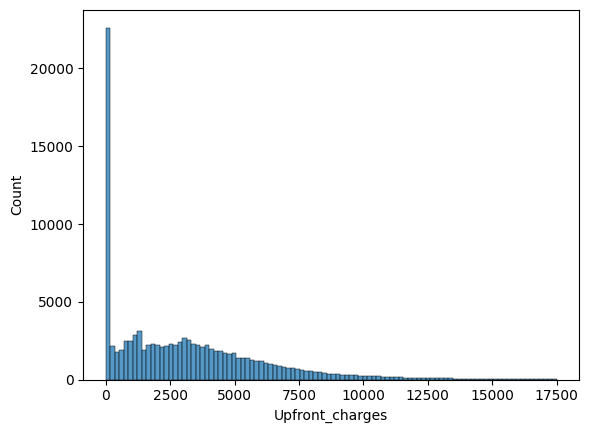

In [28]:
sns.histplot(ds_trimmed['Upfront_charges'])
plt.show()

In [29]:
ds_trimmed['Upfront_charges'].fillna(ds['Upfront_charges'].median(), inplace=True)

### term

Дана колонка відображає термін кредиту . Зважаючи на те що дані не симетрично розподілені для заміни значення nan цієї колонки варто використати медіану.

In [30]:
display(ds_trimmed['term'].describe())
ds_trimmed['term'].fillna(ds['term'].median(), inplace=True)


count    147279.000000
mean        335.015576
std          58.525009
min          96.000000
25%         360.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: term, dtype: float64

### Neg_ammortization

Neg_ammortization  використовується  для позначення ситуації, коли виплати по кредиту чи позиці не покривають накопичені відсотки, що призводить до зростання загальної суми боргу. Дана колонка має 2 значення not_neg та neg_amm що позначає чи  амортизація є негативною чи не являється такою. 

<b>Оскільки пропущені значення є категоріальними то для їх заповнення я викорисаю моду.</b>

In [31]:
mode_value = ds_trimmed['Neg_ammortization'].mode()[0]
ds_trimmed['Neg_ammortization'].fillna(mode_value, inplace=True)

print(ds_trimmed['Neg_ammortization'].value_counts()) 

Neg_ammortization
not_neg    132355
neg_amm     14964
Name: count, dtype: int64


### age

Дана колонка відображає вік клієнтів. Вона є категоріальна. Для заповнення пропущених значень я використаю моду.

In [32]:
print("Кількість пропущених значень:", ds_trimmed['age'].isna().sum())
mode_value = ds_trimmed['age'].mode()[0]
ds_trimmed['age'].fillna(mode_value, inplace=True)

print(ds_trimmed['age'].value_counts()) 

Кількість пропущених значень: 199
age
45-54    34545
35-44    32589
55-64    32190
65-74    20501
25-34    19086
>74       7073
<25       1335
Name: count, dtype: int64


### income

Дана колонка описує дохід клієнта. Вона має числові значення. Для точнішої заміни порожніх значень замінимо середнім значенням для кожної окремої вікової категорії

In [33]:
ds_trimmed.groupby('age')['income'].describe()


,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
25-34,17814.0,6488.198046,4021.291129,0.0,3960.0,5760.0,8040.0,51120.0
35-44,30508.0,7590.204537,4747.960215,0.0,4620.0,6660.0,9300.0,51120.0
45-54,32310.0,7737.782730,5592.582951,0.0,4320.0,6480.0,9480.0,51120.0
55-64,30580.0,6733.071288,5227.786577,0.0,3600.0,5460.0,8340.0,51120.0
65-74,19157.0,5288.102521,4204.730005,0.0,2820.0,4200.0,6360.0,51120.0
<25,1275.0,4797.552941,4764.447578,0.0,2460.0,3600.0,5580.0,51120.0
>74,6551.0,4628.004885,3832.641475,0.0,2460.0,3600.0,5520.0,51120.0


In [34]:
# Group by 'age' and calculate the median income for each age group
median_income_by_age = ds_trimmed.groupby('age')['income'].median()

# Impute missing values directly using the groupby object
ds_trimmed['income']= ds_trimmed['income'].fillna(ds_trimmed['age'].map(median_income_by_age))

### submission_of_application

Дана колонка відображає чи дана заявка є подана чи ні . Вона є категоріальна . Для пропущених значень я використав моду

In [35]:
print("Кількість пропущених значень:", ds_trimmed['submission_of_application'].isna().sum())
mode_value = ds_trimmed['submission_of_application'].mode()[0]
ds_trimmed['submission_of_application'].fillna(mode_value, inplace=True)

print(ds_trimmed['submission_of_application'].value_counts()) 


Кількість пропущених значень: 199
submission_of_application
to_inst     94992
not_inst    52327
Name: count, dtype: int64


### proprety_value

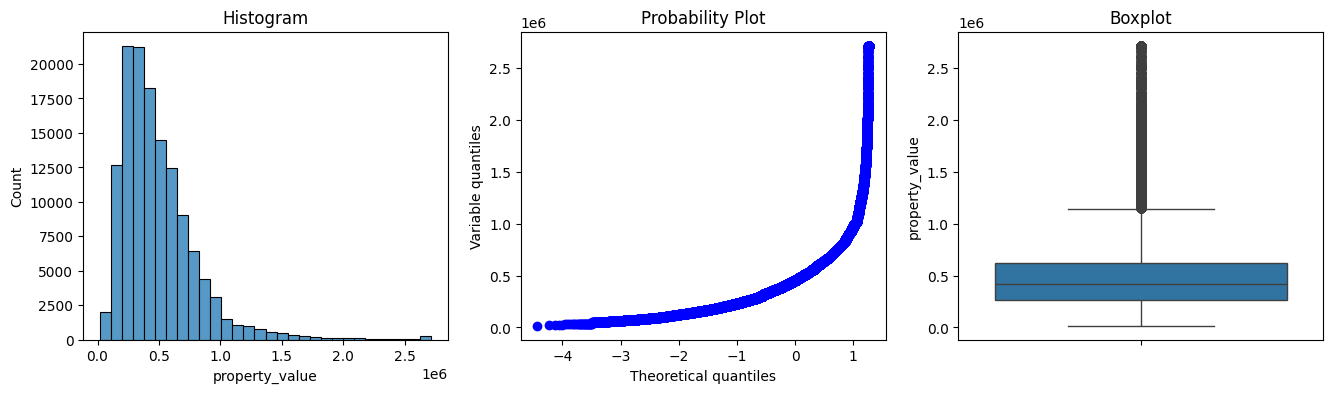

In [36]:
diagnostic_plots(ds_trimmed, 'property_value')

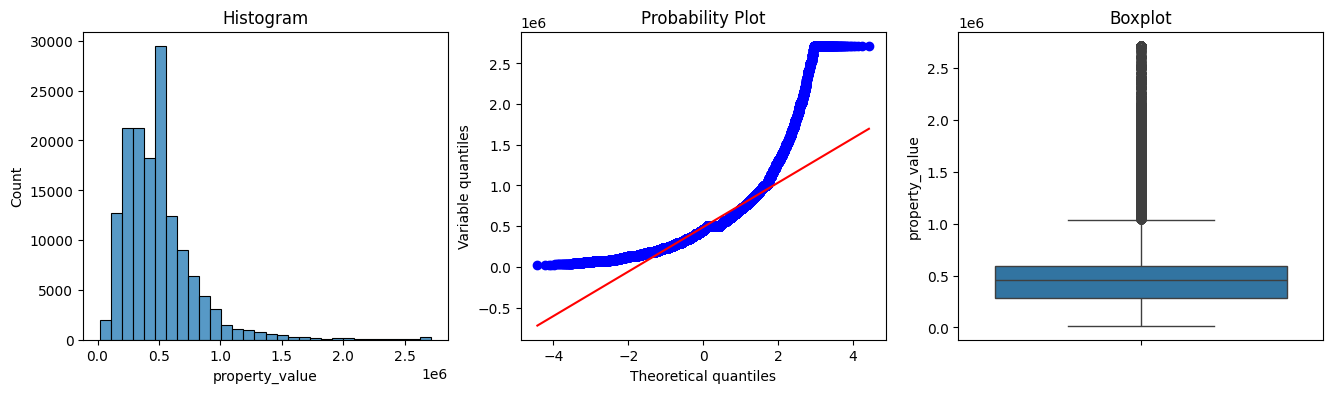

In [37]:
ds_trimmed['property_value'].fillna(ds['property_value'].mean(), inplace=True)
diagnostic_plots(ds_trimmed, 'property_value')

### LTV

Оскільки LTV являється  відношенням loan_amount до  property_value то для точного заповнення просто підраховуємо його значення і вставляємо замість порожнього значення.

In [38]:
ds_trimmed['LTV'].fillna((ds_trimmed['loan_amount']/ds_trimmed['property_value'])*100, inplace = True)

### Закінчення етапу заміни порушених даних

In [39]:
missing = []

for x in ds_trimmed.columns:
    if ds_trimmed[x].isnull().sum() != 0:
        print(x, ds_trimmed[x].isnull().sum())
        missing.append(x)
 

З результату попреднього коду можна побачити що не лишилося жодних пропущених значень

## Кодування категоріальних ознак

In [40]:
from sklearn.preprocessing import OneHotEncoder
display(ds_trimmed.dtypes)

Unnamed: 0                     int64
ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
c

### loan_limit

Дана колонка має 2 значення комфорний та не комфорний  тому значення з неї перетворимо на 1 та 0 відповідно.

In [41]:
ds_trimmed['loan_limit'] = ds_trimmed['loan_limit'].map({'cf': 1, 'ncf': 0,1:1,0:0})
ds_trimmed['loan_limit'].unique()

array([1, 0], dtype=int64)

### Gender

Зважаючи на те що неможливо  просто порівняти ознаки цієї колонки  для кодування я використаю бінарне кодування

In [42]:
ds_trimmed['Gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [43]:
ds_trimmed = pd.get_dummies(ds_trimmed,columns=['Gender'],drop_first=True)
ds_trimmed[[ 'Gender_Male', 'Gender_Joint','Gender_Sex Not Available']] = ds_trimmed[['Gender_Male', 'Gender_Joint','Gender_Sex Not Available']].astype(int)

### approv_in_adv

Зважаючи на те що дана колонка має 2 поля які один одному заперечують , то для їхнього кодуваання я використаю бінарне кодування де pre буде 1 а nopre 0.

In [44]:
ds_trimmed['approv_in_adv'].unique()
ds_trimmed['approv_in_adv'] = ds_trimmed['approv_in_adv'].map({'pre': 1, 'nopre': 0,1:1,0:0})

### loan_type
Зважаючи на те що loan_type неможна однозначно сказати який тип кращий то для їхнього кодування я використаю бінарне кодування.

In [45]:
ds_trimmed['loan_type'].unique()
ds_trimmed = pd.get_dummies(ds_trimmed,columns=['loan_type'],drop_first=True)
ds_trimmed[[ 'loan_type_type2', 'loan_type_type3']] = ds_trimmed[['loan_type_type2', 'loan_type_type3']].astype(int)


### loan_purpose

неможливо визначити вагу кожної мети тому , бінарне кодування

In [46]:
ds_trimmed['loan_purpose'].unique()
ds_trimmed = pd.get_dummies(ds_trimmed,columns=['loan_purpose'],drop_first=True)
ds_trimmed[[ 'loan_purpose_p2', 'loan_purpose_p3','loan_purpose_p4']] = ds_trimmed[['loan_purpose_p2', 'loan_purpose_p3','loan_purpose_p4']].astype(int)

### Credit_Worthiness

дана колонка має 2 значення тому бінарне кодування

In [47]:
ds_trimmed['Credit_Worthiness'].unique()
ds_trimmed['Credit_Worthiness'] = ds_trimmed['Credit_Worthiness'].map({'l1': 1, 'l2': 0,1:1,0:0})

### open_credit

Дана колонка має 2 взаємозаперечувальні значення тому opc 1 a nopc 0.

In [48]:
ds_trimmed['open_credit'].unique()
ds_trimmed['open_credit'] = ds_trimmed['open_credit'].map({'opc': 1, 'nopc': 0,1:1,0:0})

### business_or_commercial

Дана колонка має 2 взаємозаперечувальні значення тому b/c 1 a nob/c 0.

In [49]:
display(ds_trimmed['business_or_commercial'].unique())
ds_trimmed['business_or_commercial'] = ds_trimmed['business_or_commercial'].map({'b/c': 1, 'nob/c': 0,1:1,0:0})

array(['nob/c', 'b/c'], dtype=object)

### Neg_ammortization 

Дана колонка має 2 взаємозаперечувальні значення тому neg_amm 1 a not_neg 0.

In [50]:
display(ds_trimmed['Neg_ammortization'].unique())
ds_trimmed['Neg_ammortization'] = ds_trimmed['Neg_ammortization'].map({'neg_amm': 1, 'not_neg': 0,1:1,0:0})

array(['not_neg', 'neg_amm'], dtype=object)

### interest_only

Дана колонка має 2 взаємозаперечувальні значення тому int_only 1 a not_int 0.

In [51]:
display(ds_trimmed['interest_only'].unique())
ds_trimmed['interest_only'] = ds_trimmed['interest_only'].map({'int_only': 1, 'not_int': 0,1:1,0:0})

array(['not_int', 'int_only'], dtype=object)

### lump_sum_payment

Дана колонка має 2 взаємозаперечувальні значення тому lpsm 1 a not_lpsm 0.

In [52]:
display(ds_trimmed['lump_sum_payment'].unique())
ds_trimmed['lump_sum_payment'] = ds_trimmed['lump_sum_payment'].map({'lpsm': 1, 'not_lpsm': 0,1:1,0:0})

array(['not_lpsm', 'lpsm'], dtype=object)

### construction_type

Дана колонка має 2  значення тому sb 1 a mh 0. Steel Building" (сталевий будинок)
mh - "Masonry House" (цегляний будинок)

In [53]:
display(ds_trimmed['construction_type'].unique())
ds_trimmed['construction_type'] = ds_trimmed['construction_type'].map({'sb': 1, 'mh': 0,1:1,0:0})

array(['sb', 'mh'], dtype=object)

### occupancy_type

Зважаючи на те що occupancy_type можна однозначно сказати який тип кращий то для їхнього кодування я використаю порядкове числове кодування де pr=3 sr=2 ir=1 .
<ul>
    <li>Основне житло (pr): Вважається найбільш надійним типом, оскільки позичальники мають сильний інтерес до збереження своєї основної нерухомості.</li>
    <li>Друге житло (sr): Може призвести до підвищення ризиків, але все ще може бути прийнятним в залежності від фінансової ситуації позичальника.</li>
    <li>Інвестиційна нерухомість (ir): Зазвичай вважається найбільш ризиковим типом, оскільки його дохідність може коливатися, і кредитори можуть вимагати додаткових документів для оцінки фінансової стійкості позичальника.</li>
</ul>

In [54]:
display(ds_trimmed['occupancy_type'].unique())
ds_trimmed['occupancy_type'] = ds_trimmed['occupancy_type'].map({'pr': 3, 'sr': 2,'ir': 1,3:3,2:2,1:1,0:0})


array(['pr', 'sr', 'ir'], dtype=object)

### Secured_by

Зважаючи на те що Secured_by має два типи змінних в собі тому я використаю бінарне кодування де home=1  land=0 .
<ul>
    <li>Кредити, забезпечені житлом (home):Зазвичай вважаються надійнішими з точки зору кредиторів. Кредитори можуть пропонувати нижчі процентні ставки та більш сприятливі умови, оскільки ризик неповернення кредиту менший.</li>
    <li>Кредити, забезпечені землею (land):Можуть підлягати вищим процентним ставкам через вищі ризики. Кредитори можуть вимагати додаткову документацію або оцінку земельної ділянки для визначення її вартості та потенційних ризиків.</li>
</ul>

In [55]:
display(ds_trimmed['Secured_by'].unique())
ds_trimmed['Secured_by'] = ds_trimmed['Secured_by'].map({'home': 1, 'land': 0,1:1,0:0})

array(['home', 'land'], dtype=object)

### total_units

Оскільки total_units це кількість то її запросто можна подати в числовій формі

In [56]:

display(ds_trimmed['total_units'].unique())
ds_trimmed['total_units'] = ds_trimmed['total_units'].map({'1U': 1, '2U': 2,'3U':3,'4U':4,1:1,2:2,3:3,4:4,0:0})
ds_trimmed['total_units'].value_counts()

array(['1U', '2U', '3U', '4U'], dtype=object)

total_units
1    145179
2      1457
3       385
4       298
Name: count, dtype: int64

### credit_type

Зважаючи на те що credit_type неможна однозначно сказати який тип кращий то для їхнього кодування я використаю бінарне кодування.

In [57]:
display(ds_trimmed['credit_type'].unique())
ds_trimmed = pd.get_dummies(ds_trimmed,columns=['credit_type'],drop_first=True)

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

### co-applicant_credit_type

Зважаючи на те що co-applicant_credit_type неможна однозначно сказати який тип кращий але їх лише 2 типи тому для їхнього кодування я використаю бінарне кодування.

In [58]:
display(ds_trimmed['co-applicant_credit_type'].unique())
ds_trimmed = pd.get_dummies(ds_trimmed,columns=['co-applicant_credit_type'],drop_first=True)

array(['CIB', 'EXP'], dtype=object)

### age

Зважаючи на те що що певний age не має перевагу над інишим  потрібно використати бінарне кодування.

In [59]:

#display(ds_trimmed['age'].unique())
#ds_trimmed = pd.get_dummies(ds_trimmed,columns=['age'],drop_first=True)
display(ds_trimmed['age'].unique())
ds_trimmed['age'] = ds_trimmed['age'].map({'<25': 1, '25-34': 2,'35-44':3,'45-54':4,'55-64':5,'65-74':6,'>74':7, 1:1,2:2,3:3,4:4,0:0})
ds_trimmed['age'].value_counts()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25'],
      dtype=object)

age
4    34545
3    32589
5    32190
6    20501
2    19086
7     7073
1     1335
Name: count, dtype: int64

### submission_of_application

Зважаючи на те що Secured_by має два типи змінних в собі тому я використаю бінарне кодування де to_inst=1  not_inst=0 .

In [60]:
display(ds_trimmed['submission_of_application'].unique())
ds_trimmed['submission_of_application'] = ds_trimmed['submission_of_application'].map({'to_inst': 1, 'not_inst': 0,1:1,0:0})

array(['to_inst', 'not_inst'], dtype=object)

### Region

Зважаючи на те що Region неможна однозначно сказати який тип кращий то для їхнього кодування я використаю бінарне кодування.

In [61]:
display(ds_trimmed['Region'].unique())
ds_trimmed['Region'].value_counts()
ds_trimmed = pd.get_dummies(ds_trimmed,columns=['Region'],drop_first=True)


array(['south', 'North', 'central', 'North-East'], dtype=object)

### Security_type

Зважаючи на те що Security_Type має два типи змінних в собі тому я використаю бінарне кодування де direct=1  Indriect=0 .

In [62]:
display(ds_trimmed['Security_Type'].unique())
ds_trimmed['Security_Type'] = ds_trimmed['Security_Type'].map({'direct': 1, 'Indriect': 0,1:1,0:0})

array(['direct', 'Indriect'], dtype=object)

### Boolean to integer

In [63]:
bool_cols = ds_trimmed.select_dtypes(include='bool').columns
ds_trimmed[bool_cols] = ds_trimmed[bool_cols].astype(int)

## Маштабування ознак

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
fields = [
    'loan_amount', 
    'rate_of_interest', 
    'Upfront_charges', 
    'term', 
    'property_value', 
    'occupancy_type', 
    'total_units', 
    'income', 
    'Credit_Score', 
    'LTV',
    'age'
]
ds_trimmed.describe()

,Unnamed: 0,ID,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,Credit_Score,age,submission_of_application,LTV,Security_Type,Status,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,Region_North-East,Region_central,Region_south
count,147319.000000,147319.000000,147319.0,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,1.473190e+05,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,1.473190e+05,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000
mean,74326.180384,99216.180384,2019.0,0.936098,0.155879,0.958973,0.001636,0.140634,3.271901e+05,4.039955,0.439964,3005.503617,335.022360,0.101575,0.045860,0.022794,4.879860e+05,0.999776,2.880077,0.999776,1.021185,6740.383114,699.802972,4.133350,0.644805,71.900814,0.999776,0.246465,0.277778,0.285177,0.252859,0.140634,0.099437,0.021613,0.375695,0.369735,0.295081,0.103293,0.278009,0.498829,0.008356,0.058526,0.430291
std,42924.176063,42924.176063,0.0,0.244579,0.362742,0.198352,0.040413,0.347644,1.708481e+05,0.477956,0.443727,2619.061514,58.518511,0.302090,0.209181,0.149247,2.991800e+05,0.014965,0.452125,0.014965,0.195193,4828.071555,115.876099,1.417913,0.478574,21.163854,0.014965,0.430954,0.447905,0.451500,0.434653,0.347644,0.299249,0.145417,0.484303,0.482735,0.456081,0.304342,0.448019,0.500000,0.091029,0.234736,0.495118
min,0.000000,24890.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.650000e+04,2.125000,-1.084100,0.000000,96.000000,0.000000,0.000000,0.000000,1.800000e+04,0.000000,1.000000,0.000000,1.000000,0.000000,500.000000,1.000000,0.000000,3.313962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37153.500000,62043.500000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.965000e+05,3.750000,0.181200,1250.000000,360.000000,0.000000,0.000000,0.000000,2.880000e+05,1.000000,3.000000,1.000000,1.000000,3840.000000,599.000000,3.000000,0.000000,59.084302,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74317.000000,99207.000000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.965000e+05,4.039955,0.439964,2596.450000,360.000000,0.000000,0.000000,0.000000,4.580000e+05,1.000000,3.000000,1.000000,1.000000,5760.000000,699.000000,4.000000,1.000000,74.543379,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111501.500000,136391.500000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,4.365000e+05,4.250000,0.617900,3875.000000,360.000000,0.000000,0.000000,0.000000,5.880000e+05,1.000000,3.000000,1.000000,1.000000,8220.000000,800.000000,5.000000,1.000000,86.272321,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,148669.000000,173559.000000,2019.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.156500e+06,5.875000,2.128200,17496.810000,360.000000,1.000000,1.000000,1.000000,2.718000e+06,1.000000,3.000000,1.000000,4.000000,51120.000000,900.000000,7.000000,1.000000,232.278606,1.000000,1.000000,1.000000,1

### Нормалізація


In [65]:
ds_trimmed[fields].describe()

,loan_amount,rate_of_interest,Upfront_charges,term,property_value,occupancy_type,total_units,income,Credit_Score,LTV,age
count,1.473190e+05,147319.000000,147319.000000,147319.000000,1.473190e+05,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000
mean,3.271901e+05,4.039955,3005.503617,335.022360,4.879860e+05,2.880077,1.021185,6740.383114,699.802972,71.900814,4.133350
std,1.708481e+05,0.477956,2619.061514,58.518511,2.991800e+05,0.452125,0.195193,4828.071555,115.876099,21.163854,1.417913
min,1.650000e+04,2.125000,0.000000,96.000000,1.800000e+04,1.000000,1.000000,0.000000,500.000000,3.313962,1.000000
25%,1.965000e+05,3.750000,1250.000000,360.000000,2.880000e+05,3.000000,1.000000,3840.000000,599.000000,59.084302,3.000000
50%,2.965000e+05,4.039955,2596.450000,360.000000,4.580000e+05,3.000000,1.000000,5760.000000,699.000000,74.543379,4.000000
75%,4.365000e+05,4.250000,3875.000000,360.000000,5.880000e+05,3.000000,1.000000,8220.000000,800.000000,86.272321,5.000000
max,1.156500e+06,5.875000,17496.810000,360.000000,2.718000e+06,3.000000,4.000000,51120.000000,900.000000,232.278606,7.000000


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Нормалізація даних
ds_trimmed[fields] = scaler.fit_transform(ds_trimmed[fields])

# Створення нового DataFrame з тими ж колонками
ds_trimmed = pd.DataFrame(ds_trimmed, columns=ds_trimmed.columns)


In [67]:
ds_trimmed.describe()

,Unnamed: 0,ID,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,Credit_Score,age,submission_of_application,LTV,Security_Type,Status,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,Region_North-East,Region_central,Region_south
count,147319.000000,147319.000000,147319.0,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000
mean,74326.180384,99216.180384,2019.0,0.936098,0.155879,0.958973,0.001636,0.140634,0.272535,0.510655,0.439964,0.171774,0.905388,0.101575,0.045860,0.022794,0.174069,0.999776,0.940038,0.999776,0.007062,0.131854,0.499507,0.522225,0.644805,0.299552,0.999776,0.246465,0.277778,0.285177,0.252859,0.140634,0.099437,0.021613,0.375695,0.369735,0.295081,0.103293,0.278009,0.498829,0.008356,0.058526,0.430291
std,42924.176063,42924.176063,0.0,0.244579,0.362742,0.198352,0.040413,0.347644,0.149867,0.127455,0.443727,0.149688,0.221661,0.302090,0.209181,0.149247,0.110807,0.014965,0.226063,0.014965,0.065064,0.094446,0.289690,0.236319,0.478574,0.092433,0.014965,0.430954,0.447905,0.451500,0.434653,0.347644,0.299249,0.145417,0.484303,0.482735,0.456081,0.304342,0.448019,0.500000,0.091029,0.234736,0.495118
min,0.000000,24890.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.084100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37153.500000,62043.500000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.157895,0.433333,0.181200,0.071442,1.000000,0.000000,0.000000,0.000000,0.100000,1.000000,1.000000,1.000000,0.000000,0.075117,0.247500,0.333333,0.000000,0.243576,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74317.000000,99207.000000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.245614,0.510655,0.439964,0.148396,1.000000,0.000000,0.000000,0.000000,0.162963,1.000000,1.000000,1.000000,0.000000,0.112676,0.497500,0.500000,1.000000,0.311094,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111501.500000,136391.500000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.368421,0.566667,0.617900,0.221469,1.000000,0.000000,0.000000,0.000000,0.211111,1.000000,1.000000,1.000000,0.000000,0.160798,0.750000,0.666667,1.000000,0.362320,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,148669.000000,173559.000000,2019.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.128200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Стандартизація

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds[['Interest_rate_spread']])

# transform train and test sets
ds_scaled = scaler.transform(ds[['Interest_rate_spread']])

# Кінець

### Аномалії

In [72]:
ds_trimmed.describe()

,Unnamed: 0,ID,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,Credit_Score,age,submission_of_application,LTV,Security_Type,Status,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,Region_North-East,Region_central,Region_south
count,147319.000000,147319.000000,147319.0,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000
mean,74326.180384,99216.180384,2019.0,0.936098,0.155879,0.958973,0.001636,0.140634,0.272535,0.510655,0.439964,0.171774,0.905388,0.101575,0.045860,0.022794,0.174069,0.999776,0.940038,0.999776,0.007062,0.131854,0.499507,0.522225,0.644805,0.299552,0.999776,0.246465,0.277778,0.285177,0.252859,0.140634,0.099437,0.021613,0.375695,0.369735,0.295081,0.103293,0.278009,0.498829,0.008356,0.058526,0.430291
std,42924.176063,42924.176063,0.0,0.244579,0.362742,0.198352,0.040413,0.347644,0.149867,0.127455,0.443727,0.149688,0.221661,0.302090,0.209181,0.149247,0.110807,0.014965,0.226063,0.014965,0.065064,0.094446,0.289690,0.236319,0.478574,0.092433,0.014965,0.430954,0.447905,0.451500,0.434653,0.347644,0.299249,0.145417,0.484303,0.482735,0.456081,0.304342,0.448019,0.500000,0.091029,0.234736,0.495118
min,0.000000,24890.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.084100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37153.500000,62043.500000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.157895,0.433333,0.181200,0.071442,1.000000,0.000000,0.000000,0.000000,0.100000,1.000000,1.000000,1.000000,0.000000,0.075117,0.247500,0.333333,0.000000,0.243576,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74317.000000,99207.000000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.245614,0.510655,0.439964,0.148396,1.000000,0.000000,0.000000,0.000000,0.162963,1.000000,1.000000,1.000000,0.000000,0.112676,0.497500,0.500000,1.000000,0.311094,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111501.500000,136391.500000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.368421,0.566667,0.617900,0.221469,1.000000,0.000000,0.000000,0.000000,0.211111,1.000000,1.000000,1.000000,0.000000,0.160798,0.750000,0.666667,1.000000,0.362320,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,148669.000000,173559.000000,2019.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.128200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Пропущені значення

In [73]:
missing = []

for x in ds_trimmed.columns:
    if ds_trimmed[x].isnull().sum() != 0:
        print(x, ds_trimmed[x].isnull().sum())
        missing.append(x)

### Категоріальні ознаки

In [74]:
len(ds_trimmed.columns)
ds_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147319 entries, 0 to 148669
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    147319 non-null  int64  
 1   ID                            147319 non-null  int64  
 2   year                          147319 non-null  int64  
 3   loan_limit                    147319 non-null  int64  
 4   approv_in_adv                 147319 non-null  int64  
 5   Credit_Worthiness             147319 non-null  int64  
 6   open_credit                   147319 non-null  int64  
 7   business_or_commercial        147319 non-null  int64  
 8   loan_amount                   147319 non-null  float64
 9   rate_of_interest              147319 non-null  float64
 10  Interest_rate_spread          147319 non-null  float64
 11  Upfront_charges               147319 non-null  float64
 12  term                          147319 non-null  fl

### Маштабування ознак

In [75]:
ds_trimmed.describe()

,Unnamed: 0,ID,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,Credit_Score,age,submission_of_application,LTV,Security_Type,Status,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,Region_North-East,Region_central,Region_south
count,147319.000000,147319.000000,147319.0,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000,147319.000000
mean,74326.180384,99216.180384,2019.0,0.936098,0.155879,0.958973,0.001636,0.140634,0.272535,0.510655,0.439964,0.171774,0.905388,0.101575,0.045860,0.022794,0.174069,0.999776,0.940038,0.999776,0.007062,0.131854,0.499507,0.522225,0.644805,0.299552,0.999776,0.246465,0.277778,0.285177,0.252859,0.140634,0.099437,0.021613,0.375695,0.369735,0.295081,0.103293,0.278009,0.498829,0.008356,0.058526,0.430291
std,42924.176063,42924.176063,0.0,0.244579,0.362742,0.198352,0.040413,0.347644,0.149867,0.127455,0.443727,0.149688,0.221661,0.302090,0.209181,0.149247,0.110807,0.014965,0.226063,0.014965,0.065064,0.094446,0.289690,0.236319,0.478574,0.092433,0.014965,0.430954,0.447905,0.451500,0.434653,0.347644,0.299249,0.145417,0.484303,0.482735,0.456081,0.304342,0.448019,0.500000,0.091029,0.234736,0.495118
min,0.000000,24890.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.084100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37153.500000,62043.500000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.157895,0.433333,0.181200,0.071442,1.000000,0.000000,0.000000,0.000000,0.100000,1.000000,1.000000,1.000000,0.000000,0.075117,0.247500,0.333333,0.000000,0.243576,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74317.000000,99207.000000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.245614,0.510655,0.439964,0.148396,1.000000,0.000000,0.000000,0.000000,0.162963,1.000000,1.000000,1.000000,0.000000,0.112676,0.497500,0.500000,1.000000,0.311094,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111501.500000,136391.500000,2019.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.368421,0.566667,0.617900,0.221469,1.000000,0.000000,0.000000,0.000000,0.211111,1.000000,1.000000,1.000000,0.000000,0.160798,0.750000,0.666667,1.000000,0.362320,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,148669.000000,173559.000000,2019.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.128200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Висновок

In [76]:
ds_trimmed.to_csv('changed.csv', index=False)

Висновок. Під час проведення підготовки даних для подальшого моделювання було здійснено опрацювання аномалій , замінено відсутні значення  , проведено кодування категоріальних ознак та використано методи маштабування для нормалізації даних.Це дозволило зменшити вплив нестандартних значень на модель та забезпечити однорідність шкалування різних ознак. Завдяки ретельній підготовці, створена база даних готова для подальшого моделювання з метою отримання точних та надійних результатів.